In [3]:
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 

# PyTorch libraries and modules


%matplotlib inline

2021-08-09 14:42:45.130861: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Распознавание марок машин (маленькая база)

In [4]:
train_path = './content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 25 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

In [5]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.1 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [6]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 3086 images belonging to 3 classes.
Found 341 images belonging to 3 classes.


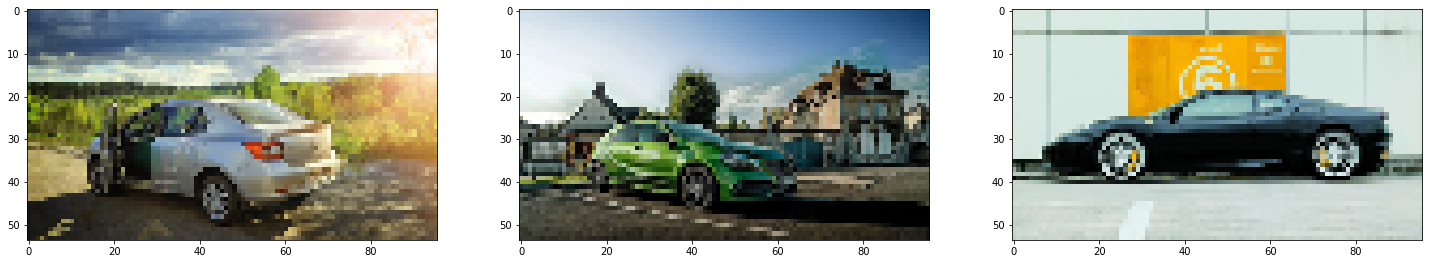

In [7]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии
plt.show() #Показываем изображения

In [8]:
#Создаем последовательную модель
class TestModel:
    def createModel():
        model = Sequential()

        model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
        model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(5, 5)))

        model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
        # model.add(Dropout(0.2))

        model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        # model.add(Dropout(0.2))

        model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3, 3)))

        model.add(Dropout(0.2))
        model.add(Flatten())

        model.add(Dense(2048, activation='relu'))
        model.add(Dense(2048, activation='relu'))

        model.add(Dense(len(train_generator.class_indices), activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

        model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
        return model
    
class StableModel:
    def createModel():
        model = Sequential()
        #Первый сверточный слой
        model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
        #Второй сверточный слой
        model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        #Третий сверточный слой
        model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
        #Четвертый сверточный слой
        model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        #Пятый сверточный слой
        model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
        #Шестой сверточный слой
        model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        #Слой регуляризации Dropout
        model.add(Dropout(0.2))
        #Слой преобразования двумерных данных в одномерные 
        model.add(Flatten())
        #Полносвязный слой
        model.add(Dense(2048, activation='relu'))
        #Полносвязный слой
        model.add(Dense(4096, activation='relu'))
        #Вызодной полносвязный слой
        model.add(Dense(len(train_generator.class_indices), activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
        return model

In [75]:
model = StableModel.createModel()

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=35,
    verbose=1
)

Epoch 1/35
123/123 [==============================] - 15s 114ms/step - loss: 0.9804 - accuracy: 0.4737 - val_loss: 0.9322 - val_accuracy: 0.5477
Epoch 2/35
123/123 [==============================] - 14s 113ms/step - loss: 0.9116 - accuracy: 0.5626 - val_loss: 0.9035 - val_accuracy: 0.5508
Epoch 3/35
123/123 [==============================] - 14s 114ms/step - loss: 0.8691 - accuracy: 0.5975 - val_loss: 0.8999 - val_accuracy: 0.5785
Epoch 4/35
123/123 [==============================] - 14s 115ms/step - loss: 0.8446 - accuracy: 0.6214 - val_loss: 0.8586 - val_accuracy: 0.6092
Epoch 5/35
123/123 [==============================] - 14s 116ms/step - loss: 0.7913 - accuracy: 0.6488 - val_loss: 0.8092 - val_accuracy: 0.6554
Epoch 6/35
123/123 [==============================] - 14s 114ms/step - loss: 0.7524 - accuracy: 0.6753 - val_loss: 0.7976 - val_accuracy: 0.6431
Epoch 7/35
123/123 [==============================] - 14s 114ms/step - loss: 0.7243 - accuracy: 0.6887 - val_loss: 0.8006 - val_ac

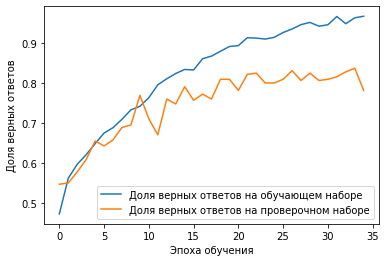

In [76]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
testModel = TestModel.createModel()

history = testModel.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=45,
    verbose=1
)



2021-08-09 14:42:53.962815: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-09 14:42:53.999619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-09 14:42:54.000116: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce GTX 1660 SUPER computeCapability: 7.5
coreClock: 1.83GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 312.97GiB/s
2021-08-09 14:42:54.000148: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-09 14:42:54.003020: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-09 14:42:54.003066: I tensorflow/stream_executo

Epoch 1/45


2021-08-09 14:42:55.312307: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-08-09 14:42:55.680817: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2021-08-09 14:42:56.195612: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-09 14:42:56.602323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


123/123 [==============================] - 19s 116ms/step - loss: 0.9551 - accuracy: 0.4953 - val_loss: 0.9315 - val_accuracy: 0.5231
Epoch 2/45
123/123 [==============================] - 13s 105ms/step - loss: 0.9076 - accuracy: 0.5508 - val_loss: 0.9074 - val_accuracy: 0.5815
Epoch 3/45
123/123 [==============================] - 13s 105ms/step - loss: 0.8722 - accuracy: 0.5844 - val_loss: 0.8870 - val_accuracy: 0.5292
Epoch 4/45
123/123 [==============================] - 13s 105ms/step - loss: 0.8348 - accuracy: 0.6060 - val_loss: 0.8481 - val_accuracy: 0.6277
Epoch 5/45
123/123 [==============================] - 13s 105ms/step - loss: 0.8043 - accuracy: 0.6286 - val_loss: 0.8448 - val_accuracy: 0.6154
Epoch 6/45
123/123 [==============================] - 13s 106ms/step - loss: 0.7632 - accuracy: 0.6580 - val_loss: 0.7932 - val_accuracy: 0.6400
Epoch 7/45
123/123 [==============================] - 13s 105ms/step - loss: 0.7177 - accuracy: 0.6831 - val_loss: 0.7740 - val_accuracy: 0.6

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()